# Lista 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *
plt.style.use('StyleBold.mplstyle')



**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade  
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de  
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico clássico:  

$$P(x) \propto e^{-\beta E(x)}, \quad \text{com} \quad E(x) = \frac{1}{2}kx^2 .$$


onde $\beta = \frac{1}{k_B T}$, $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma^2 = \frac{1}{\beta k}$.

**(a)** Gere valores aleatórios de \(x\) a partir de uma distribuição uniforme e aceite-os com probabilidade proporcional a \(P(x)\) (método de rejeição). Assim, obtém-se uma amostra de valores de \(x\) que devem refletir a distribuição de Boltzmann. 

In [2]:
# Constantes utilizadas

k = 2 * np.pi           
beta = 1                
n = 100000    # Número de amostras


sigma = np.sqrt(1 / (k * beta))  # Desvio padrão
P_max = np.sqrt((beta * k) / (2 * np.pi))  


xmax = 3 * sigma        
xmin = -3 * sigma     



In [3]:
x_nao_rejeitados = []
for _ in range(n):
    x =  np.random.uniform(xmax, xmin)
    P = np.exp(-beta*E(x,k))
    gama = np.random.uniform(0, P_max)
    
    if gama < P:
        x_nao_rejeitados.append(x)




In [4]:
x_nao_rejeitados[:10]

[-0.6144477016723504,
 -0.6257643641995148,
 -0.13739726713664324,
 -0.2805052732292166,
 -0.30812920386362785,
 -0.4858486617691158,
 0.15392481712056183,
 -0.17209401558868254,
 0.2095977106062511,
 -0.3542314322290352]

**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica.  



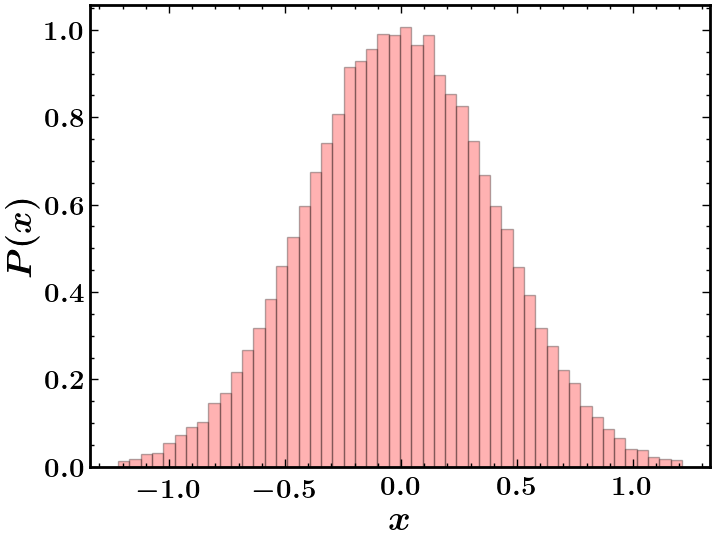

In [5]:
x_freq, bin_edges = histograma(x_nao_rejeitados, num_bins = 50, normalizar= True)
plt.bar(bin_edges, x_freq, width=bin_edges[1] - bin_edges[0], edgecolor='black', color = 'red', alpha = 0.3)
plt.ylabel(r'$P(x)$')
plt.xlabel(r'$x$')
plt.show()



**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:  
$$ P_{\text{teórica}}(x) = \sqrt{\frac{\beta k}{2\pi}} \exp\left(-\frac{\beta k x^2}{2}\right).$$

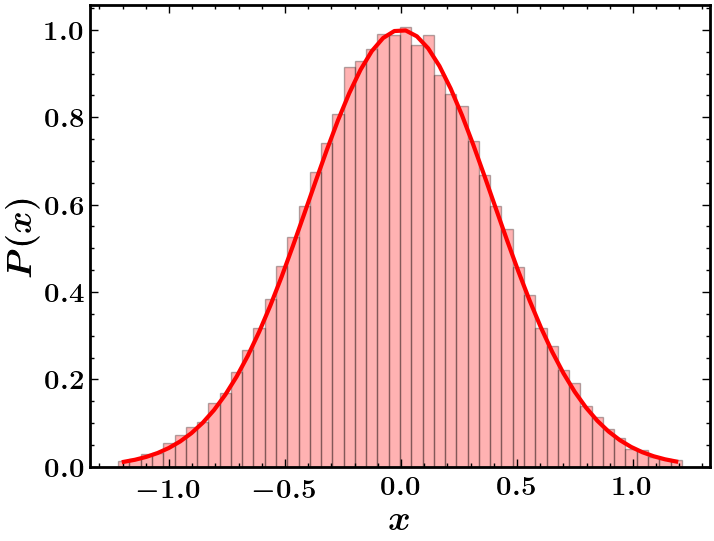

In [6]:
x_freq, bin_edges = histograma(x_nao_rejeitados, num_bins = 50, normalizar= True)
P_teorico= np.sqrt( (beta*k)/(2*np.pi))*np.exp(-0.5*beta*k*bin_edges**2)


plt.bar(bin_edges, x_freq, width=bin_edges[1] - bin_edges[0], edgecolor='black', color = 'red', alpha = 0.3 )
plt.plot(bin_edges, P_teorico, 'r-', )
plt.ylabel(r'$P(x)$')
plt.xlabel(r'$x$')
plt.show()

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:  
$$ \mathbb{E}[x] = 0, \quad \text{Var}(x) = \frac{1}{\beta k}. $$  

In [8]:
print(r'Valor da média teórica: ', 0)
print(r'Valor da média encontrado: ', media(np.array(x_nao_rejeitados)))
print('-'*50)
print(r'Valor da variancia Teórica: ', np.sqrt(1/(beta*k)))
print(r'Valor da variancia encontrado: ', np.std(np.array(x_nao_rejeitados)))


Valor da média teórica:  0
Valor da média encontrado:  -0.003890032818540491
--------------------------------------------------
Valor da variancia Teórica:  0.3989422804014327
Valor da variancia encontrado:  0.3915579961559503


**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras são consistentes com a distribuição teórica.

In [18]:
def ks_test(data, P_teorico):
    return max(abs(data - P_teorico))

def qui_test(data, P_teorico):
    return sum( ((data - P_teorico)**2)/P_teorico)

ks_test(x_freq, P_teorico)
print('ks_test: ', ks_test(x_freq, P_teorico))

qui_test(x_freq, P_teorico)
print('qui_test: ', qui_test(x_freq, P_teorico))




ks_test:  0.05872761396719628
qui_test:  0.03706604477968371




(f) Crie um Q-Q plot para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica. 

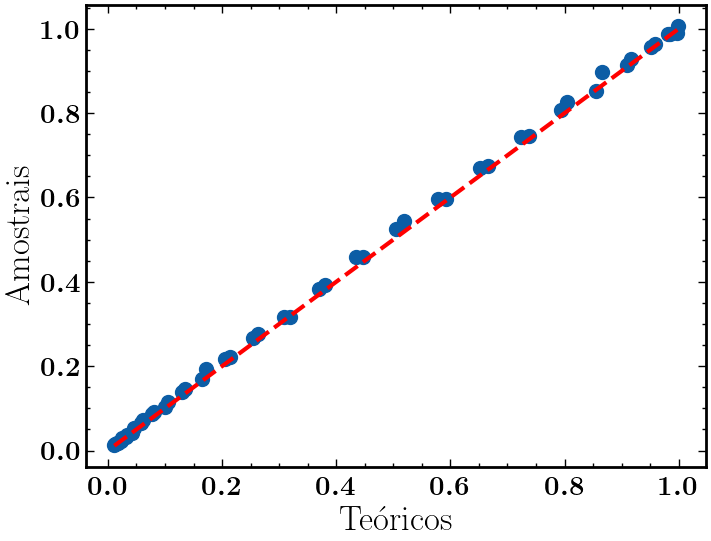

In [25]:
plt.scatter(sorted(P_teorico), sorted(x_freq))
plt.plot(sorted(P_teorico), sorted(P_teorico), color='red', linestyle='--')  # Linha de referência
plt.xlabel('Teóricos')
plt.ylabel('Amostrais')
plt.show()

**Problema 2**:  

Sistemas biestáveis, como reações químicas em equilíbrio ou certos tipos de circuitos biológicos, frequentemente apresentam potenciais com múltiplos mínimos. Um exemplo clássico é o potencial:  

$$
V(x) = x^4 - 4x^2,
\tag{1}
$$ 

que possui dois mínimos estáveis e uma barreira entre eles. A dinâmica de uma partícula sujeita a este potencial, na presença de ruído térmico, pode ser descrita pela equação de Langevin, tipicamente escrita na forma unidimensional como:  

$$
\frac{dx}{dt} = -\frac{1}{\gamma} \frac{dV}{dx} + \eta(t),
$$  

onde $\gamma$ é um coeficiente de amortecimento e $\eta(t)$ é um ruído Gaussiano com média zero e correlação:  

$$
\langle \eta(t) \eta(t') \rangle = 2D \delta(t - t').
$$




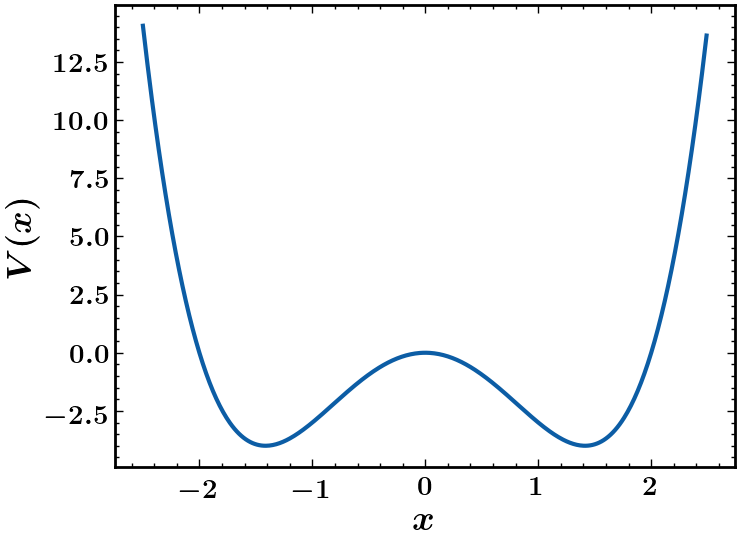

In [ ]:
plt.plot(np.arange(-2.5,2.5,0.01), [V(x) for x in np.arange(-2.5,2.5,0.01)], '-')
plt.ylabel(r'$V(x)$')
plt.xlabel(r'$x$')
plt.show()

(a) Mostre que no equilíbrio, a distribuição de probabilidade estacionária da posição da partícula é a distribuição de Boltzmann:  

$$
P_{\text{eq}}(x) \propto e^{-\beta V(x)},
$$

com $\beta = 1 / (k_B T)$.  


(b) Ao invés de resolver a equação de Langevin diretamente, utilize o algoritmo de Metropolis para simular o comportamento estatístico da partícula neste potencial. Escolha uma posição inicial aleatória $x_0$. A cada passo, proponha uma nova posição:  

$$
x_{\text{nova}} = x + \Delta x,
$$

onde $\Delta x$ é um passo aleatório, por exemplo, gerado a partir de uma distribuição uniforme ou normal.  

Calcule a variação do potencial:  

$$
\Delta V = V(x_{\text{nova}}) - V(x),
$$

onde $V(x)$ é dado pela Eq. (1). A nova posição $x_{\text{nova}}$ é aceita com probabilidade:  

$$
P = \min(1, e^{-\beta \Delta V}).
$$ 

Caso não seja aceita, a posição permanece em $x$. Plote a posição \(x\) como função do tempo $t$.  



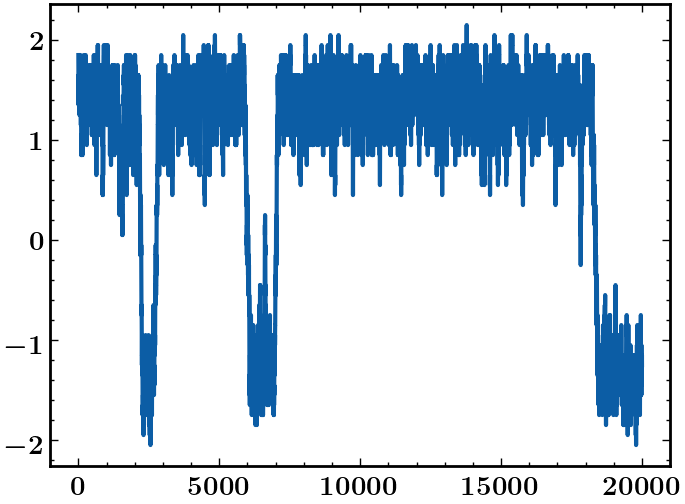

In [29]:
posicao_inicial = np.random.uniform(-2.5,2.5)
#posicao_inicial = 0

tamanho_passo = 0.1


n = 200000
posicoes_aceitas = []

for _ in range(n):
    passo = np.random.choice([-tamanho_passo, tamanho_passo])
    posicao_nova = posicao_inicial + passo

    delta_V = V(posicao_nova) - V(posicao_inicial)
    p_min = np.min([1, np.exp(-beta*delta_V)])
    
    r = np.random.uniform(0,1)
    if r < p_min:
        posicao_inicial = posicao_nova
        posicoes_aceitas.append(posicao_nova)
    else:   
        posicoes_aceitas.append(posicao_inicial)

plt.plot(np.arange(n)[:20000], posicoes_aceitas[:20000], '-')
plt.show()   


(c) Compare as distribuições estacionárias obtidas pela solução do estado estacionário e o histograma resultante das simulações do algoritmo de Metropolis e verifique que a distribuição de posições obtida pelo Monte Carlo coincide com a distribuição de Boltzmann resultante da dinâmica de Langevin.  



<function matplotlib.pyplot.show(close=None, block=None)>

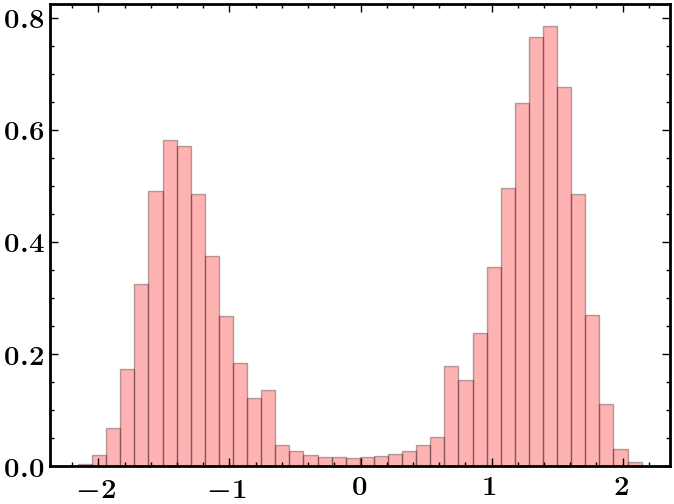

In [33]:
posicoes_aceitas_beta = []  # Lista para armazenar as posições aceitas para o beta atual
for _ in range(n):
    
    passo = np.random.choice([-tamanho_passo, tamanho_passo])
    posicao_nova = posicao_inicial + passo

    
    delta_V = V(posicao_nova) - V(posicao_inicial)
    p_min = np.min([1, np.exp(-beta * delta_V)])

    
    r = np.random.uniform(0, 1)
    if r < p_min:
        posicao_inicial = posicao_nova
    posicoes_aceitas_beta.append(posicao_inicial)


plt.hist(posicoes_aceitas_beta, bins = 40, density= True,color='red', edgecolor='black', alpha=0.3)
plt.show


(d) Realize longas simulações de Monte Carlo e calcule a probabilidade de encontrarmos a partícula na vizinhança dos mínimos do potencial $V(x)$ como função da temperatura $\beta$.  


In [11]:
posicao_inicial = np.random.uniform(-2.5, 2.5)
#posicao_inicial = 0
tamanho_passo = 0.1
n = 200000

# Lista para armazenar as posições aceitas para cada beta
posicoes_aceitas_betas = []

betas = [1, 0.8, 0.6, 0.4, 0.2, 0]

for beta in betas:
    posicoes_aceitas_beta = []  # Lista para armazenar as posições aceitas para o beta atual
    for _ in range(n):
        
        passo = np.random.choice([-tamanho_passo, tamanho_passo])
        posicao_nova = posicao_inicial + passo

        
        delta_V = V(posicao_nova) - V(posicao_inicial)
        p_min = np.min([1, np.exp(-beta * delta_V)])

        
        r = np.random.uniform(0, 1)
        if r < p_min:
            posicao_inicial = posicao_nova
        posicoes_aceitas_beta.append(posicao_inicial)

    
    posicoes_aceitas_betas.append(posicoes_aceitas_beta)


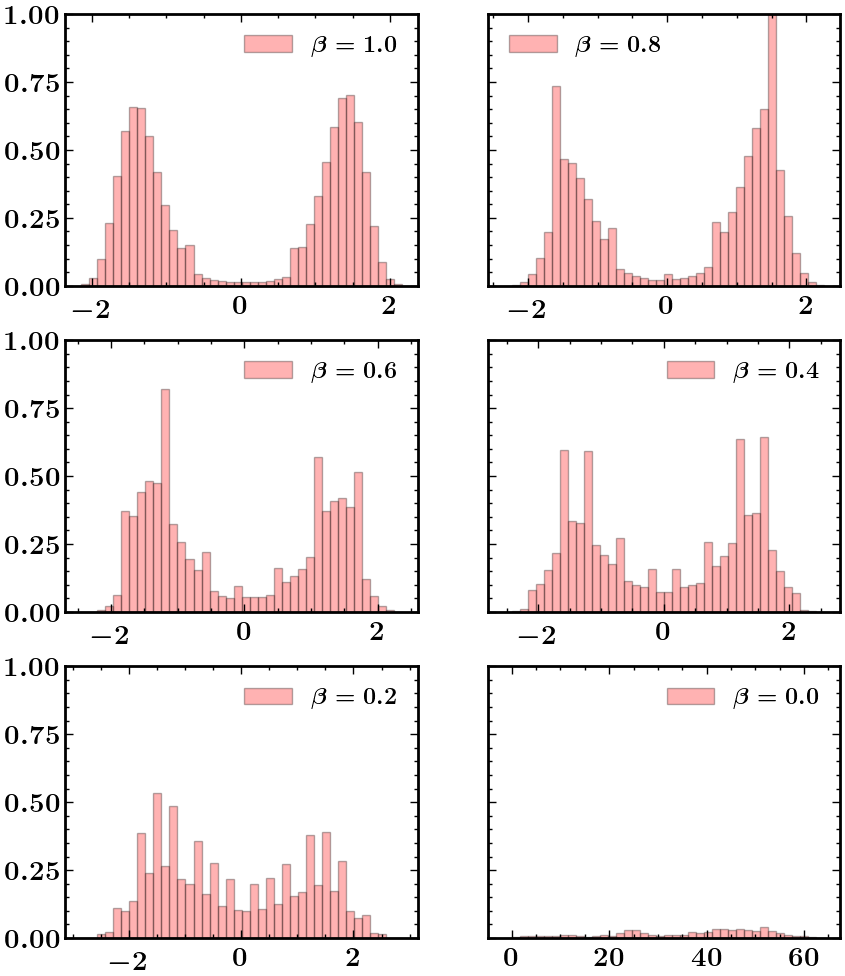

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharey=True)
ylim = (0, 1)


for ax, beta in zip(axes.flat, betas):
    ax.hist(posicoes_aceitas_betas[betas.index(beta)], bins= 40, density= True,color='red', edgecolor='black', alpha=0.3, label= fr'$\beta = {beta:.1f}$' )
    ax.set_ylim(ylim)
    ax.legend()


In [ ]:
x0 = np.random.uniform(-2.5,2.5)
x0 = 0

print('x0: ', x0)

passo= 0.1



n = 100000
x_all = []
V_all = []
for i in range(n):
    delta = np.random.choice([-passo, passo])
    x_novo = x0 + delta

    delta_V = V(x_novo) - V(x0)
    p_min = np.min([1, np.exp(-beta*delta_V)])
    
    r = np.random.uniform(0,1)
    if r < p_min:
        x0 = x_novo
        x_all.append(x_novo)
    else:   
        x_all.append(x0)

    


x0:  0


**Problema 3**: A constante de Stefan-Boltzmann, $ \sigma $, relaciona a energia total emitida por um corpo negro com sua temperatura. Ela é dada por:  
$$
\sigma = \frac{\pi^2 k_B^4}{60 \hbar^3 c^2} \cdot \zeta(4),
$$
onde $ \zeta(s) $ é a função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma integral:  
$$
\zeta(s) = \frac{1}{\Gamma(s)} \int_0^\infty \frac{x^{s-1} e^{-x}}{1 - e^{-x}} dx,
$$
onde $ \Gamma(s) = (s-1)! $ é a função Gamma.  

Utilizando **importance sampling**, gere amostras aleatórias de $ x $ de uma distribuição exponencial, $ \omega(x) = e^{-x} $ para $ x \geq 0 $, que corresponde ao termo $ e^{-x} $ no integrando.  

Reescreva a integral como:  
$$
\zeta(s) = \frac{1}{\Gamma(s)} E\left[\frac{x^{s-1}}{1 - e^{-x}}\right].
$$

Compare seu resultado de Monte Carlo com o valor exato:  
$$
\zeta(4) = \frac{\pi^4}{90}.
$$ 


In [14]:
soma_integral = 0

num_amostras = 1000

expoente = 4

soma_integral_pontal = []

for _ in range(num_amostras):
    random_uniform = np.random.uniform(0, 1)
    amostra_exponencial = -np.log(1 - random_uniform)
    soma_integral += (amostra_exponencial**(expoente - 1)) / (1 - np.exp(-amostra_exponencial))
    soma_integral_pontal.append(soma_integral)


z_estimado = soma_integral / num_amostras
print('Estimativa de ζ(4):', z_estimado / 6)

zeta_exato = (np.pi**4) / 90
print('Valor exato de ζ(4):', zeta_exato)


Estimativa de ζ(4): 1.063227254541401
Valor exato de ζ(4): 1.082323233711138


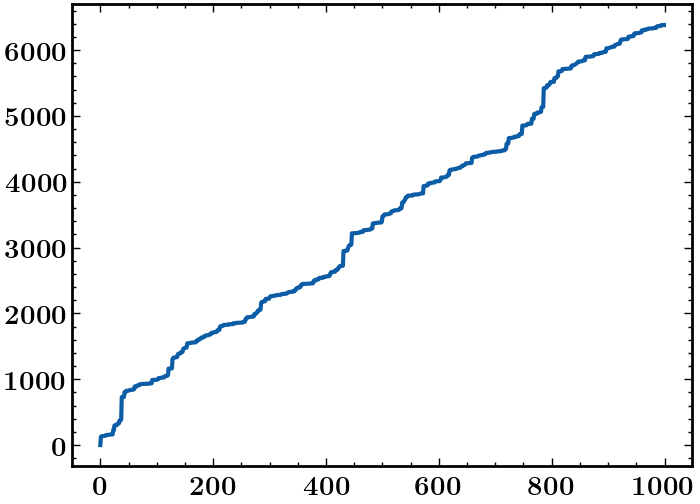

In [ ]:
plt.plot(np.arange(num_amostras), np.array(soma_integral_pontal))

## 4


In [ ]:
random_uniform = np.random.uniform(0, 1)
n = 10000
x_aceitos = 0
for _ in range(n):
    x = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)

    if y < np.exp(-x**2):
        x_aceitos+= 1

print(x_aceitos/n)


0.7442


In [ ]:
random_uniform = np.random.uniform(0, 1)
n = 500000
x_aceitos = 0
d = 3
for _ in range(n):
    x = np.random.uniform(0, 1, size = d)
    modulo =  np.linalg.norm(x)
    y = np.random.uniform(0, 1)

    if y < np.exp(-modulo**2):
        x_aceitos+= 1

print(x_aceitos/n)


0.416936


In [18]:
a = [3 ,4 ]
print('a : ', a )

nor = np.linalg.norm(a)
print('nor: ', nor)

a :  [3, 4]
nor:  5.0
